In [2]:
from ml_utilities import Audio

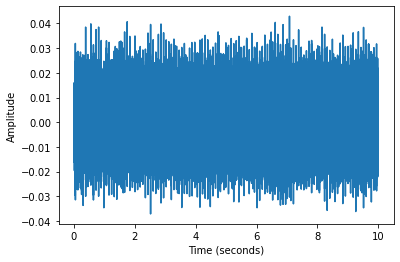

In [5]:
audio = Audio.load_audio('audio/20200428_091053.WAV')
audio.plot_waveform()

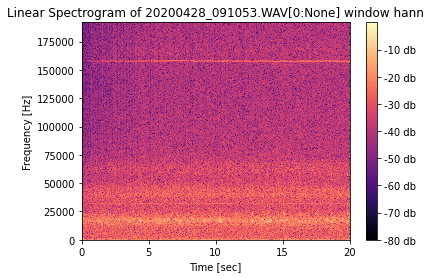

In [6]:
audio.plot_linear_spectrogram()

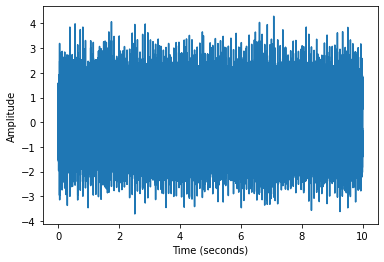

In [7]:
audio.gain(100.0,'multiply').plot_waveform()

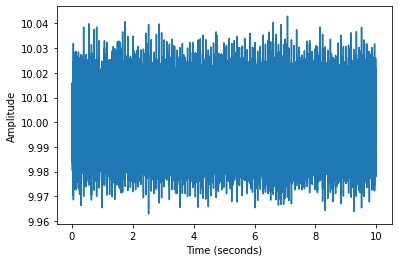

In [8]:
audio.gain(10,'additive').plot_waveform()

preslice: (250000,) 0 None 250000
slice: (250000,) > (250000,) 0 249999 (250000,) 250000


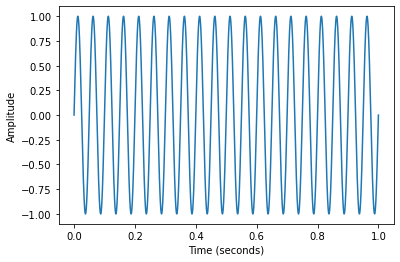

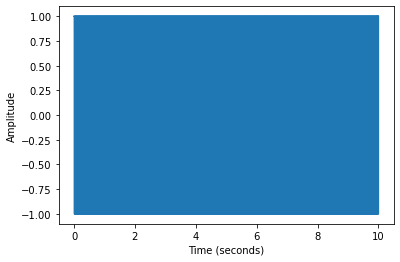

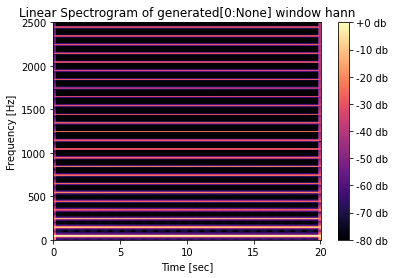

In [9]:
sample_rate = 5000
samples = 10 * sample_rate
square_tone = Audio.load_tone(50,samples,'square',sample_rate)

square_tone.plot_waveform()
square_tone.plot_linear_spectrogram()

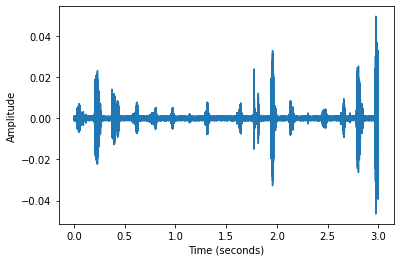

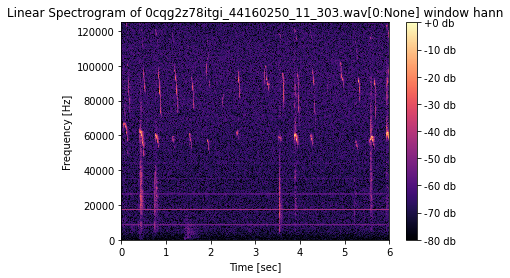

In [10]:
mouse = Audio.load_audio('audio/0cqg2z78itgi_44160250_11_303.wav')
mouse.plot_waveform()
mouse.plot_linear_spectrogram()